In [11]:
import pandas as pd
import os
import json
from kaggle.api.kaggle_api_extended import KaggleApi

# Path to kaggle.json file
kaggle_json_path = os.path.expanduser("C:/Users/sammy/.kaggle/kaggle.json")  # Adjust if necessary

# Ensure the Kaggle API can authenticate
if not os.path.exists(kaggle_json_path):
    raise FileNotFoundError("kaggle.json file not found at the specified path.")

# Set Kaggle API credentials using kaggle.json
with open(kaggle_json_path, "r") as f:
    credentials = json.load(f)
os.environ['KAGGLE_USERNAME'] = credentials['username']
os.environ['KAGGLE_KEY'] = credentials['key']

# Initialize the Kaggle API and authenticate
api = KaggleApi()
api.authenticate()

# Specify the dataset and cache directory for downloaded files
dataset_id = "dgomonov/new-york-city-airbnb-open-data"
cache_dir = os.path.expanduser("C:/Users/sammy/OneDrive/Documents/Portfolio")
os.makedirs(cache_dir, exist_ok=True)

# Download the latest version of the dataset to the specified directory
api.dataset_download_files(dataset_id, path=cache_dir, unzip=True)

# Load the Airbnb NYC dataset
airbnb_data = pd.read_csv(os.path.join(cache_dir, "AB_NYC_2019.csv"))  # Adjust file name if necessary

# Display the first few rows of the dataset
print(airbnb_data.head())



Dataset URL: https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data
     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_re

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Basic dataset info
print(airbnb_data.info())
print(airbnb_data.describe())

# Checking for missing values
print(airbnb_data.isnull().sum())

# Fill missing values if necessary (e.g., fill in `reviews_per_month` with 0)
airbnb_data['reviews_per_month'].fillna(0, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

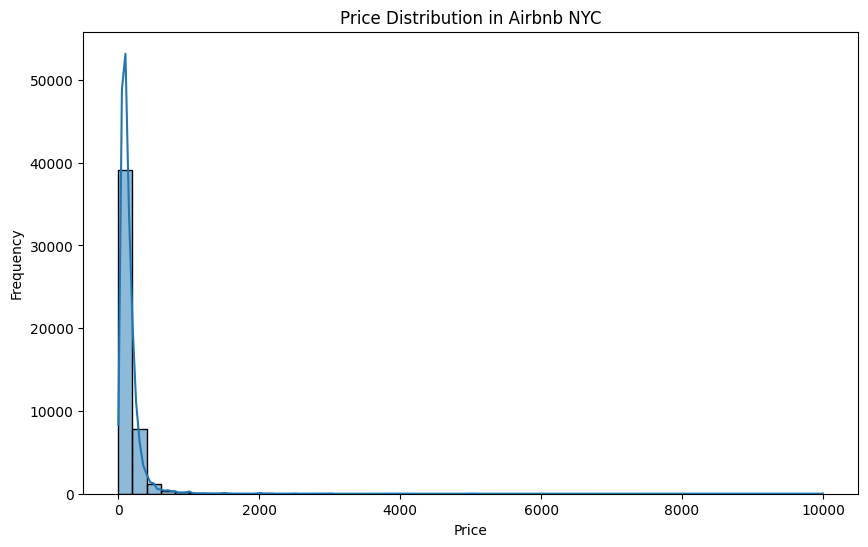

In [16]:
# Price distribution
plt.figure(figsize=(10, 6))
sns.histplot(airbnb_data['price'], bins=50, kde=True)
plt.title('Price Distribution in Airbnb NYC')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


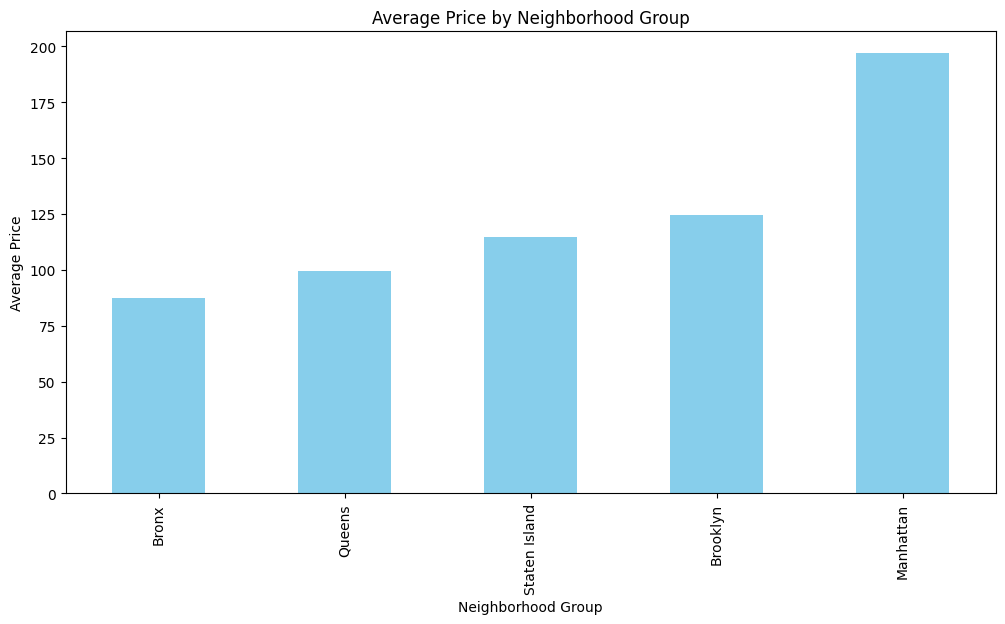

In [17]:
# Average price by neighborhood
neighborhood_price = airbnb_data.groupby('neighbourhood_group')['price'].mean().sort_values()
plt.figure(figsize=(12, 6))
neighborhood_price.plot(kind='bar', color='skyblue')
plt.title('Average Price by Neighborhood Group')
plt.xlabel('Neighborhood Group')
plt.ylabel('Average Price')
plt.show()

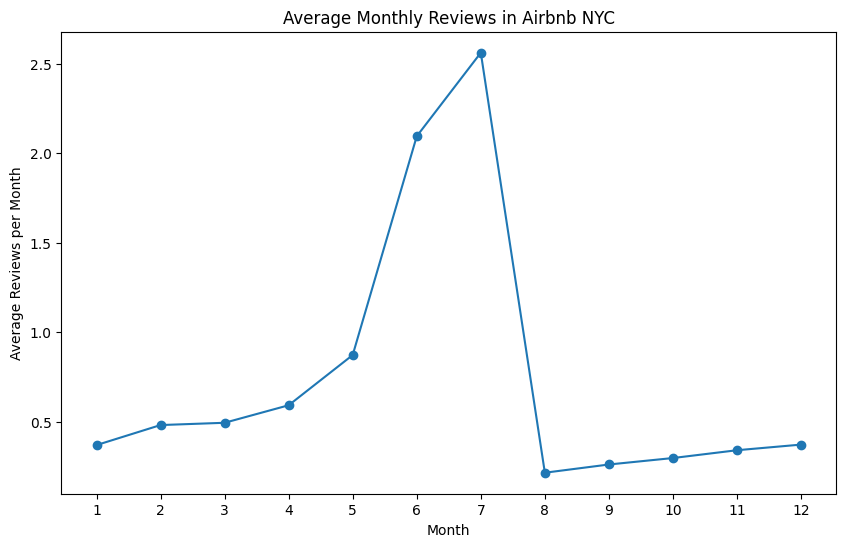

In [18]:
# Seasonal trends: Average reviews by month
airbnb_data['last_review'] = pd.to_datetime(airbnb_data['last_review'], errors='coerce')
airbnb_data['month'] = airbnb_data['last_review'].dt.month
monthly_reviews = airbnb_data.groupby('month')['reviews_per_month'].mean()

plt.figure(figsize=(10, 6))
monthly_reviews.plot(marker='o')
plt.title('Average Monthly Reviews in Airbnb NYC')
plt.xlabel('Month')
plt.ylabel('Average Reviews per Month')
plt.xticks(range(1, 13))
plt.show()

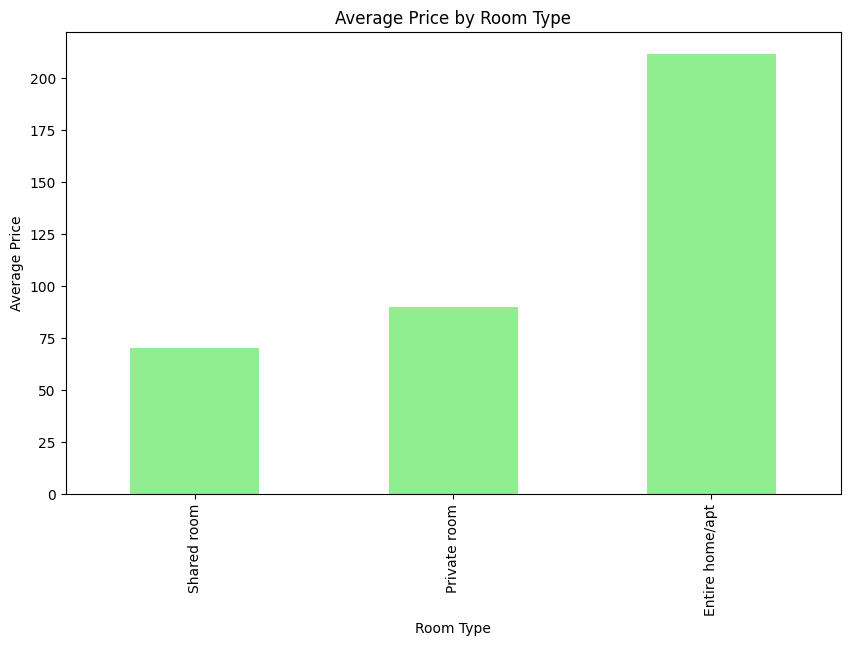

In [19]:
# Price by Room Type
room_type_price = airbnb_data.groupby('room_type')['price'].mean().sort_values()
plt.figure(figsize=(10, 6))
room_type_price.plot(kind='bar', color='lightgreen')
plt.title('Average Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.show()

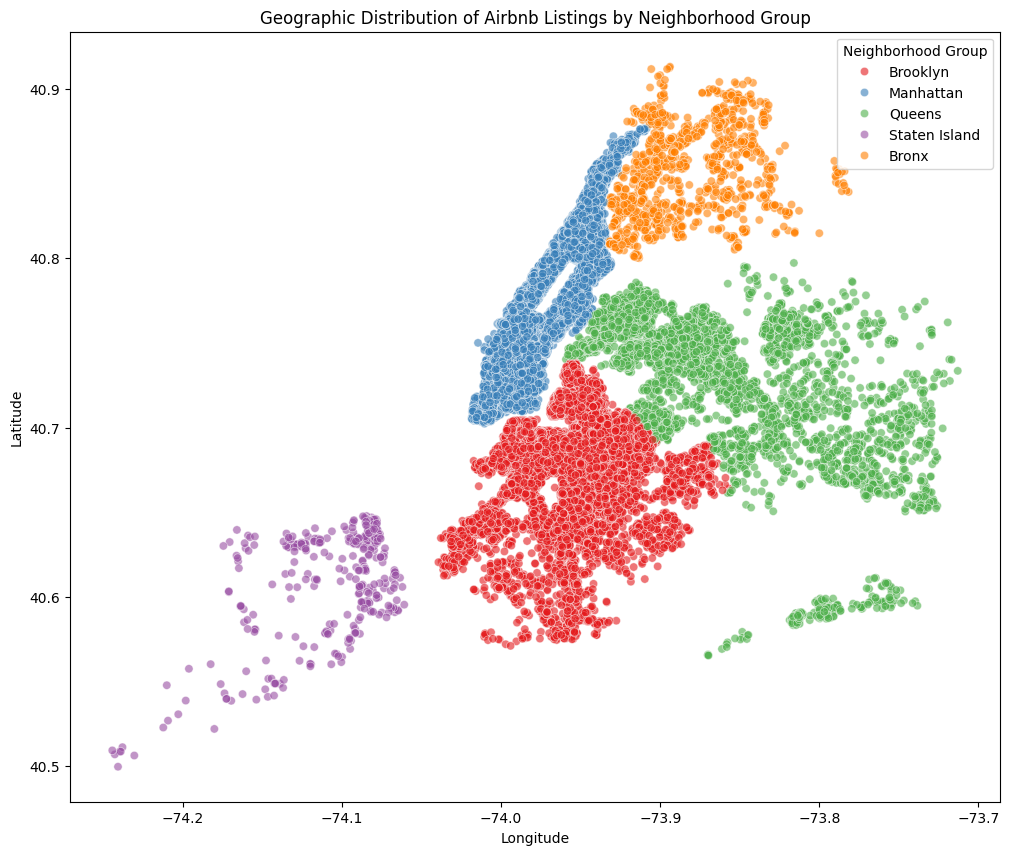

In [20]:
# Geographic Distribution of Listings
plt.figure(figsize=(12, 10))
sns.scatterplot(data=airbnb_data, x='longitude', y='latitude', hue='neighbourhood_group', alpha=0.6, palette="Set1")
plt.title('Geographic Distribution of Airbnb Listings by Neighborhood Group')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Neighborhood Group')
plt.show()

In [21]:
# Price Outliers
high_price_listings = airbnb_data[airbnb_data['price'] > airbnb_data['price'].quantile(0.95)]
print("High-price listings:")
print(high_price_listings[['name', 'neighbourhood_group', 'price', 'room_type']])

High-price listings:
                                                    name neighbourhood_group  \
61                    Sunny & Spacious Chelsea Apartment           Manhattan   
85                   perfect for a family or small group            Brooklyn   
103    2000 SF 3br 2bath West Village private  townhouse           Manhattan   
121                     3 Story Town House in Park Slope            Brooklyn   
158                     Luxury Brownstone in Boerum Hill            Brooklyn   
...                                                  ...                 ...   
48748                 US Open special 2-bed luxury condo           Manhattan   
48755  Wyndham Midtown 45 New York City 1 Bedroom Deluxe           Manhattan   
48757     Luxury & Spacious 1500 ft² MANHATTAN Townhouse           Manhattan   
48833   Brand New 3-Bed Apt in the Best Location of FiDi           Manhattan   
48839  Massage Spa. Stay overnight. Authors Artist dr...            Brooklyn   

       price      

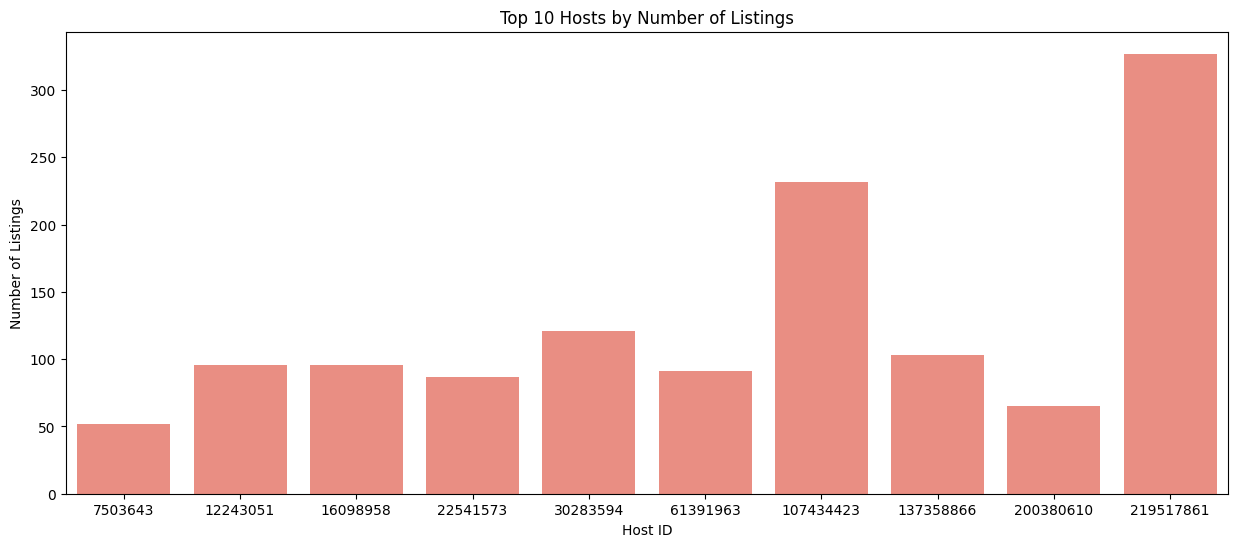

In [24]:
#Top Hosts
top_hosts = airbnb_data['host_id'].value_counts().head(10)
plt.figure(figsize=(15, 6))
sns.barplot(x=top_hosts.index, y=top_hosts.values, color='salmon')
plt.title('Top 10 Hosts by Number of Listings')
plt.xlabel('Host ID')
plt.ylabel('Number of Listings')
plt.show()